In [34]:
import zipfile
import os
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [35]:
from google.colab import files
uploaded = files.upload()

Saving archive (1).zip to archive (1) (1).zip


In [3]:
caminho_zip = '/content/archive (1).zip'
pasta_destino = 'diabetes'

In [4]:
caminho_zip = '/content/archive (1).zip'

if os.path.exists(caminho_zip):
    with zipfile.ZipFile(caminho_zip, 'r') as zip_ref:
        zip_ref.extractall(pasta_destino)
        print(f'Arquivos extraídos para {pasta_destino}')
else:
    print(f'Arquivo não encontrado: {caminho_zip}')




Arquivos extraídos para diabetes


In [5]:
# Caminho para o arquivo CSV extraído
caminho_csv = '/content/diabetes/diabetes_012_health_indicators_BRFSS2015.csv'

# Carregar a base de dados
df = pd.read_csv(caminho_csv)

# Mostrar as primeiras linhas da base de dados
print(df.head())


   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

In [6]:
df.shape

(253680, 22)

In [7]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [10]:
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['valores unicos']).transpose()

,valores unicos
Diabetes_012,3
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [11]:
df.isna().sum()

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [12]:
df.duplicated().sum()

np.int64(23899)

Há 23.899 linhas duplicadas, precisamos removê-las.

In [13]:
df.drop_duplicates(inplace=True)
df.shape

(229781, 22)

array([[<Axes: title={'center': 'Diabetes_012'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'c

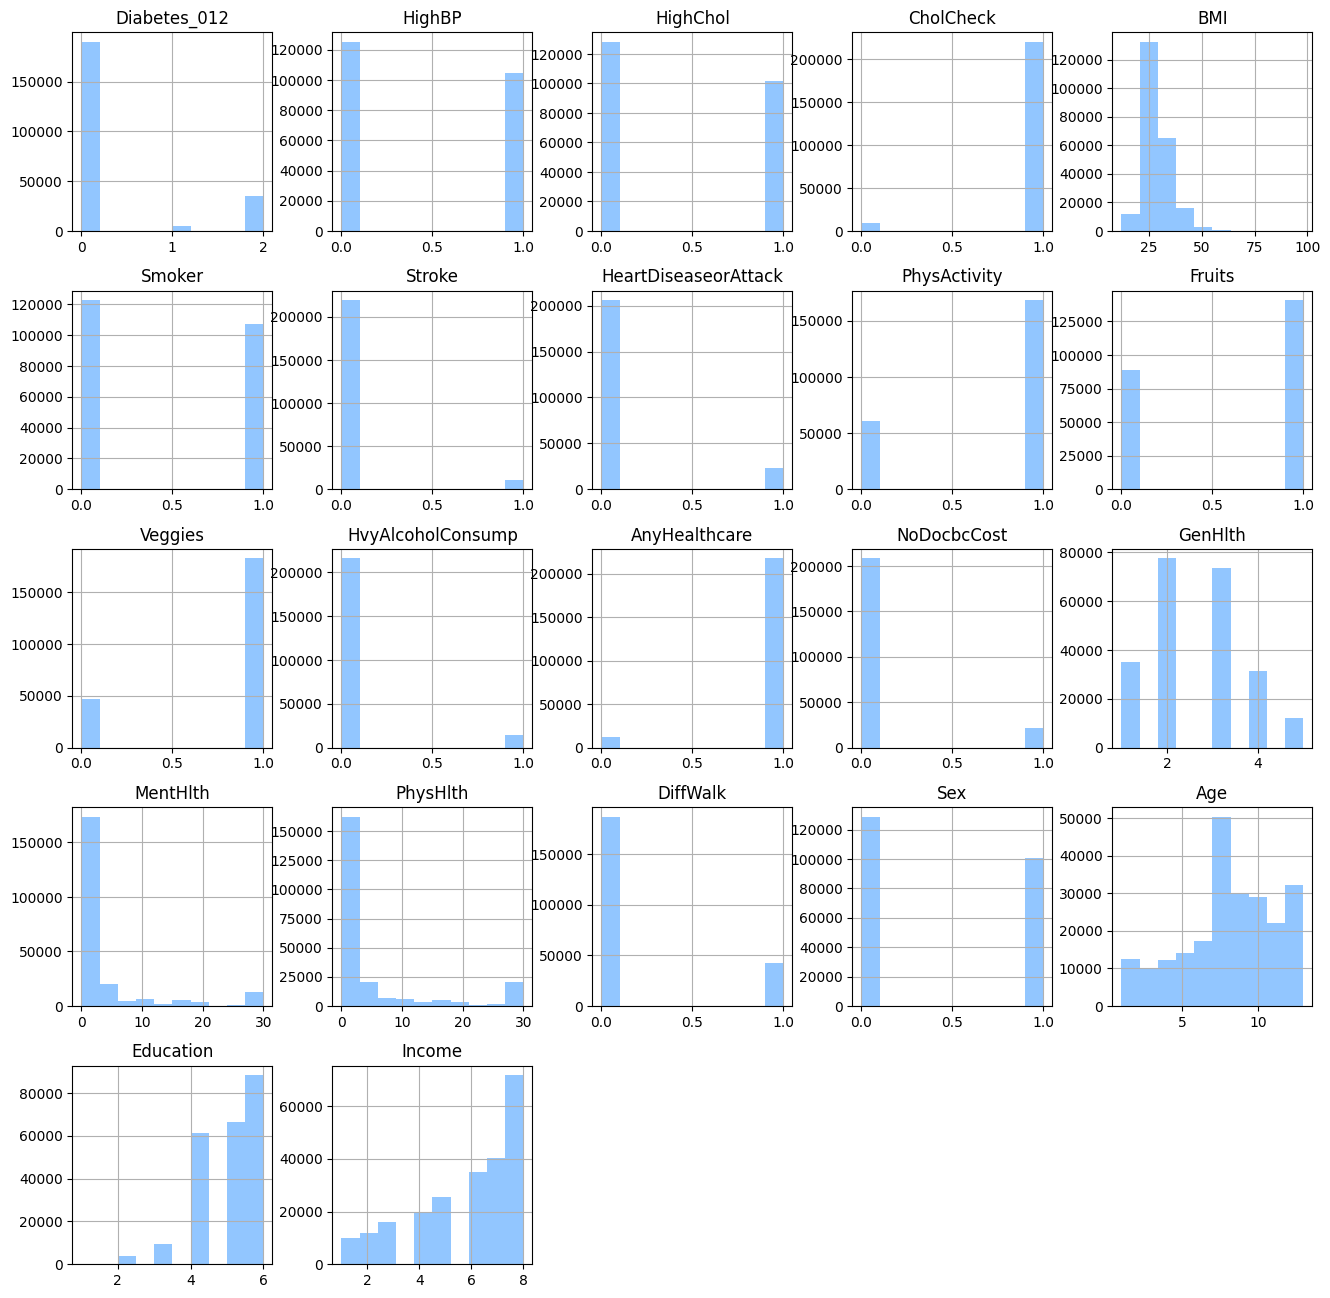

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-pastel")
plt.rcParams['font.size'] = 10
df.hist(figsize=(16, 16))

<Axes: title={'center': 'Correlação de diabestes por coluna'}>

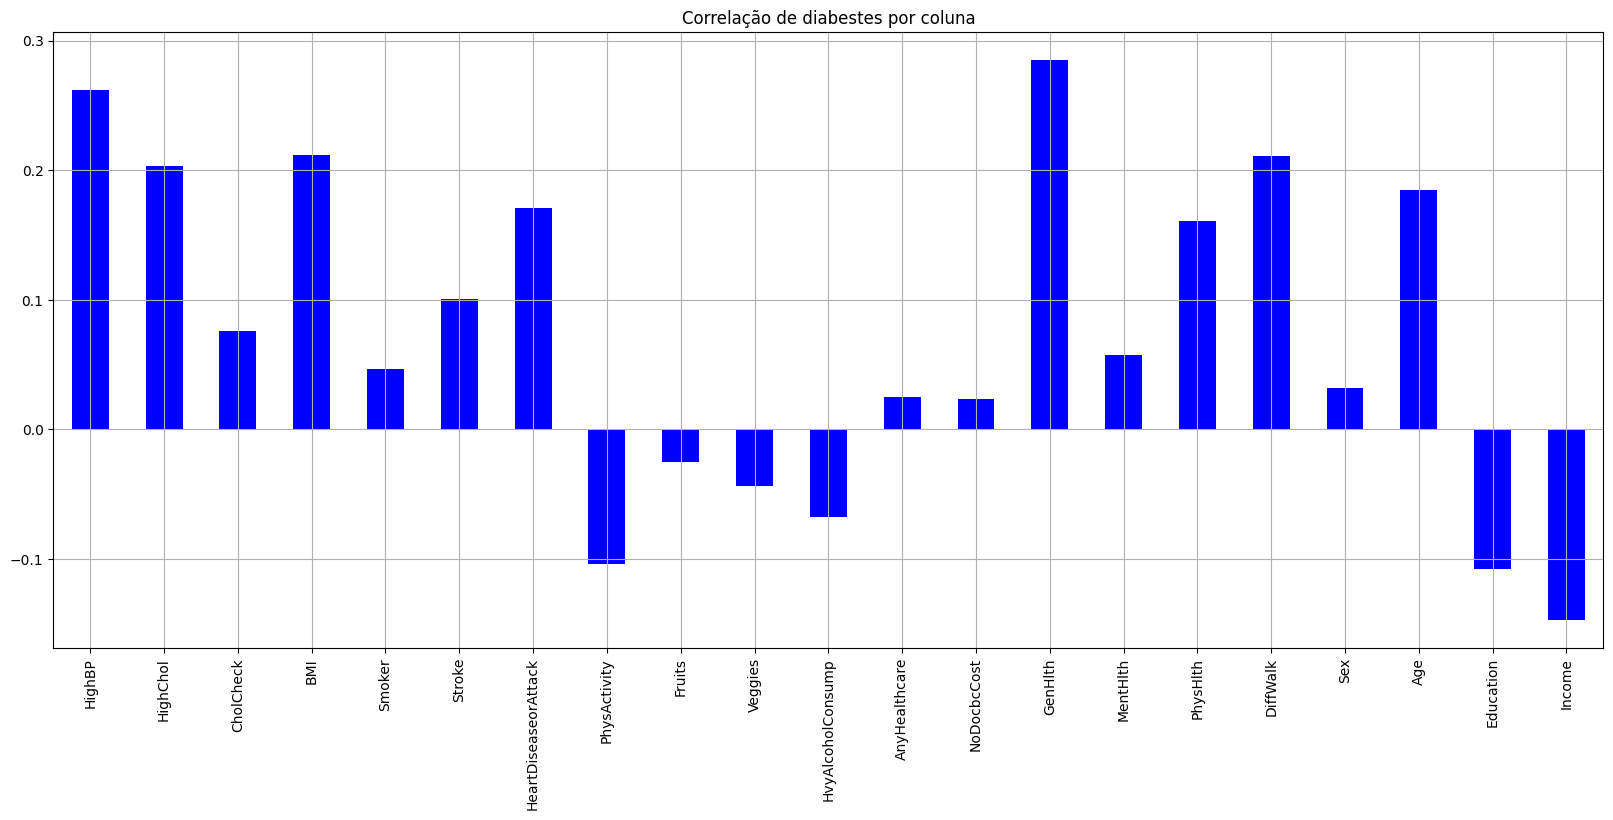

In [15]:
df.drop('Diabetes_012', axis=1).corrwith(df.Diabetes_012).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlação de diabestes por coluna", color='blue')

<Axes: xlabel='Diabetes_012', ylabel='count'>

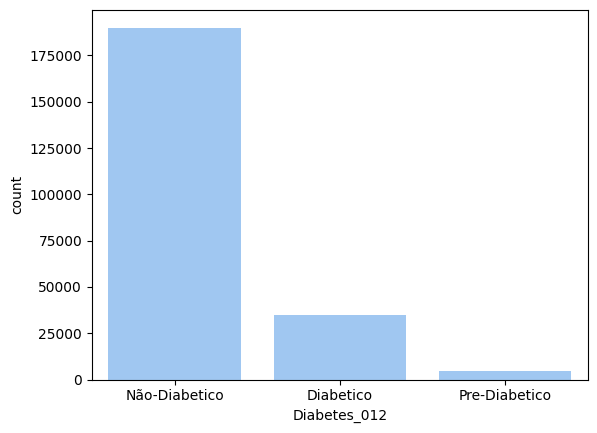

In [16]:
df.Diabetes_012 = df.Diabetes_012.replace({0: 'Não-Diabetico', 1: 'Pre-Diabetico', 2: 'Diabetico'})

sns.countplot(data=df, x='Diabetes_012')

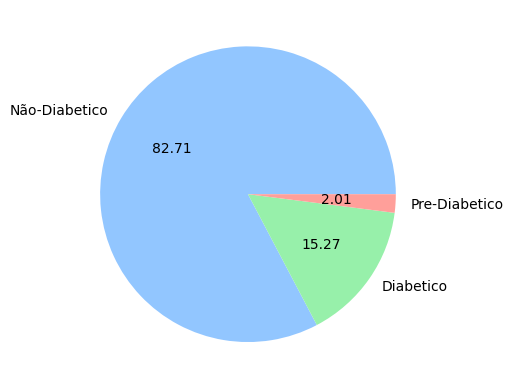

In [17]:
labels=['Não-Diabetico', 'Diabetico', 'Pre-Diabetico']
plt.pie(df["Diabetes_012"].value_counts() ,labels=labels, autopct='%.02f' );

In [ ]:
#esta com um desequilibrio de classes, vou executar o value_counts

In [18]:
df.Diabetes_012.value_counts()

,count
Diabetes_012,
Não-Diabetico,190055
Diabetico,35097
Pre-Diabetico,4629


In [19]:
#convertendo Discrete Features em Categories
binary_columns = df.columns[(df.nunique() == 2)].tolist()
binary_columns

['HighBP',
 'HighChol',
 'CholCheck',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'DiffWalk',
 'Sex']

In [20]:
df[binary_columns] = df[binary_columns].astype(int)

<Figure size 800x600 with 0 Axes>

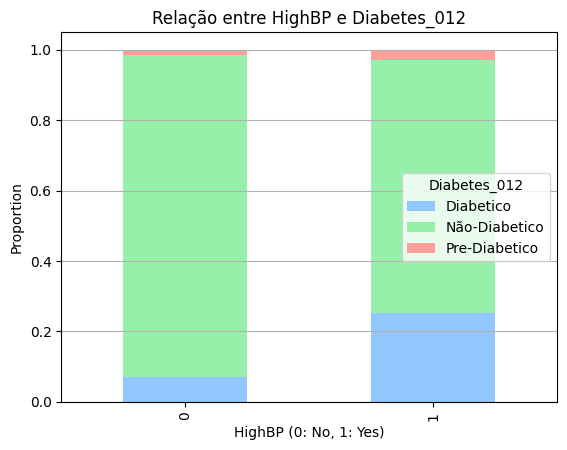

In [21]:
plt.figure(figsize=(8, 6))
bp_diabetes_relation = pd.crosstab(df['HighBP'], df['Diabetes_012'], normalize='index')
bp_diabetes_relation.plot(kind='bar', stacked=True)

plt.title('Relação entre HighBP e Diabetes_012')
plt.xlabel('HighBP (0: No, 1: Yes)')
plt.ylabel('Proportion')
plt.legend(title='Diabetes_012')
plt.grid(axis='y')

plt.show()

In [ ]:
#vemos que a pressão alta é de alguma forma a fonte do diabetes no gráfico acima.

<Figure size 800x600 with 0 Axes>

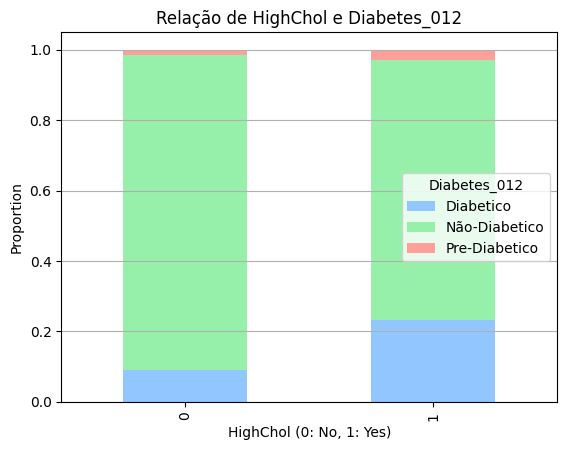

In [23]:
plt.figure(figsize=(8, 6))
chol_diabetes_relation = pd.crosstab(df['HighChol'], df['Diabetes_012'], normalize='index')
chol_diabetes_relation.plot(kind='bar', stacked=True)

plt.title('Relação de HighChol e Diabetes_012')
plt.xlabel('HighChol (0: No, 1: Yes)')
plt.ylabel('Proportion')
plt.legend(title='Diabetes_012')
plt.grid(axis='y')

plt.show()

In [ ]:
#O mesmo vale para o colesterol alto. Pacientes com colesterol alto têm diabetes ou são pré-diabéticos.

<Figure size 1000x600 with 0 Axes>

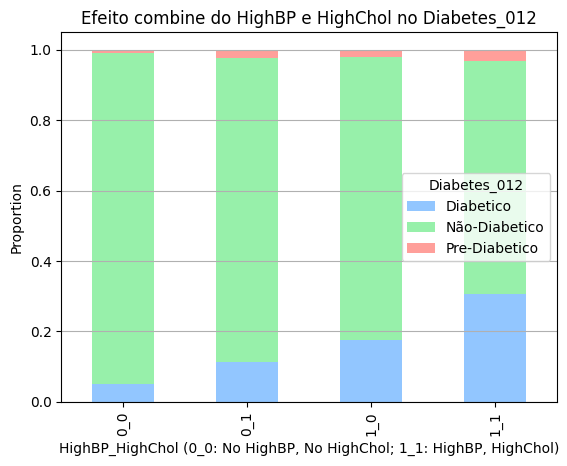

In [24]:
# df['HighBP_HighChol'] = df['HighBP'].astype(str) + "_" + df['HighChol'].astype(str)

# Plot the combined effect
plt.figure(figsize=(10, 6))
bp_chol_diabetes_relation = pd.crosstab(df['HighBP'].astype(str) + "_" + df['HighChol'].astype(str), df['Diabetes_012'], normalize='index')
bp_chol_diabetes_relation.plot(kind='bar', stacked=True)

plt.title('Efeito combine do HighBP e HighChol no Diabetes_012')
plt.xlabel('HighBP_HighChol (0_0: No HighBP, No HighChol; 1_1: HighBP, HighChol)')
plt.ylabel('Proportion')
plt.legend(title='Diabetes_012')
plt.grid(axis='y')

plt.show()

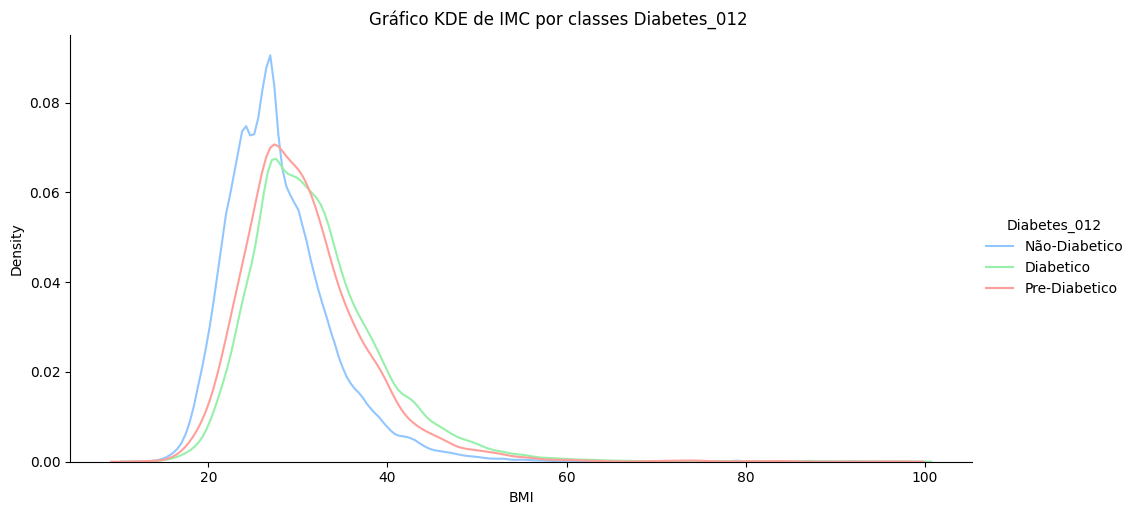

In [25]:
g = sns.FacetGrid(df, hue="Diabetes_012", height=5, aspect=2)
g.map(sns.kdeplot, "BMI").add_legend()
g.set_axis_labels("BMI", "Density")
g.fig.suptitle('Gráfico KDE de IMC por classes Diabetes_012', y=1.02)
plt.show()

In [ ]:
#O gráfico sugere que diabéticos e pré-diabéticos têm IMC ligeiramente maior do que pessoas não diabéticas.

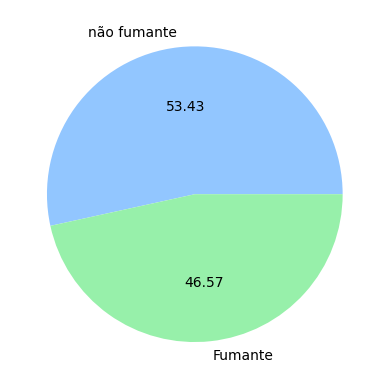

In [26]:
labels=["não fumante","Fumante"]

plt.pie(df["Smoker"].value_counts() , labels =labels ,autopct='%.02f' );

<Figure size 800x600 with 0 Axes>

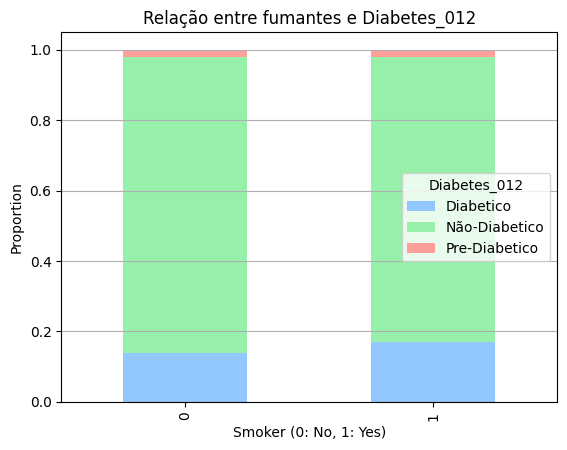

In [27]:
plt.figure(figsize=(8, 6))
chol_diabetes_relation = pd.crosstab(df['Smoker'], df['Diabetes_012'], normalize='index')
chol_diabetes_relation.plot(kind='bar', stacked=True)

plt.title('Relação entre fumantes e Diabetes_012')
plt.xlabel('Smoker (0: No, 1: Yes)')
plt.ylabel('Proportion')
plt.legend(title='Diabetes_012')
plt.grid(axis='y')

plt.show()

Text(0.5, 1.0, 'Relação entre AVC, Doença Cardíaca ou Ataque e Diabetes')

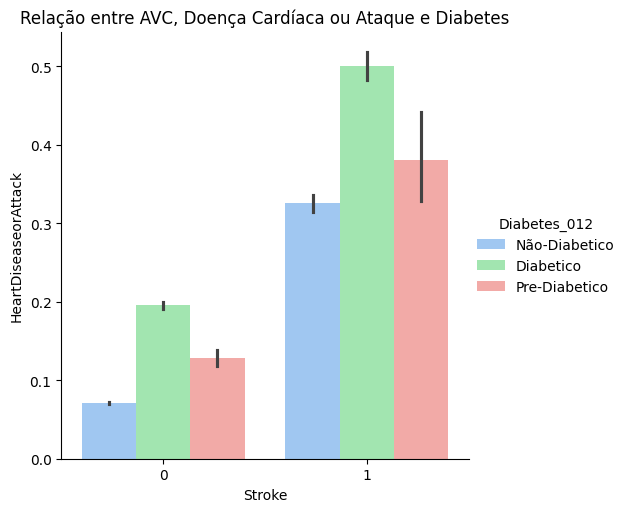

In [28]:
sns.catplot(x="Stroke" , y ="HeartDiseaseorAttack" , data = df , hue="Diabetes_012"  , kind="bar"  );
plt.title("Relação entre AVC, Doença Cardíaca ou Ataque e Diabetes")

Text(0.5, 1.0, 'Relação entre GenHlth e Diabetes')

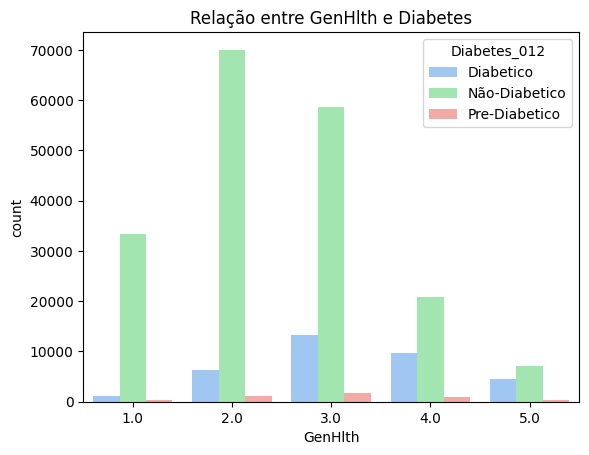

In [29]:
sns.countplot(x = df["GenHlth"],data = df,  hue = "Diabetes_012")
plt.title("Relação entre GenHlth e Diabetes")

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HighBP,229781.0,0.454441,0.497921,0.0,0.0,0.0,1.0,1.0
HighChol,229781.0,0.441760,0.496598,0.0,0.0,0.0,1.0,1.0
CholCheck,229781.0,0.959535,0.197047,0.0,1.0,1.0,1.0,1.0
BMI,229781.0,28.685670,6.786360,12.0,24.0,27.0,32.0,98.0
Smoker,229781.0,0.465661,0.498821,0.0,0.0,0.0,1.0,1.0
Stroke,229781.0,0.044756,0.206767,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,229781.0,0.103216,0.304241,0.0,0.0,0.0,0.0,1.0
PhysActivity,229781.0,0.733355,0.442206,0.0,0.0,1.0,1.0,1.0
Fruits,229781.0,0.612966,0.487073,0.0,0.0,1.0,1.0,1.0
Veggies,229781.0,0.794813,0.403839,0.0,1.0,1.0,1.0,1.0


In [37]:
# Before applying SMOTE, convert the target variable back to numerical values
label_mapping = {'Não-Diabetico': 0, 'Pre-Diabetico': 1, 'Diabetico': 2}
df['Diabetes_012'] = df['Diabetes_012'].map(label_mapping)

# Now proceed with your SMOTE and model training code
# ...

In [38]:
import torch
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# Separação das features e target
X = df.drop('Diabetes_012', axis=1).values  # Convertendo para NumPy
y = df['Diabetes_012'].values


# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



# Aplicando SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


# Convertendo de volta para tensores do PyTorch
X_resampled_torch = torch.tensor(X_resampled, dtype=torch.float32)
y_resampled_torch = torch.tensor(y_resampled, dtype=torch.long)




In [39]:
# Exibir o balanço das classes antes e depois do SMOTE
print("Original dataset shape:", pd.Series(y_train).value_counts())
print("Resampled dataset shape:", pd.Series(y_resampled).value_counts())


Original dataset shape: 0    133038
2     24568
1      3240
Name: count, dtype: int64
Resampled dataset shape: 0    133038
2    133038
1    133038
Name: count, dtype: int64


In [40]:
# Exemplo de uso no PyTorch DataLoader
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_resampled_torch, y_resampled_torch)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Testando um batch do DataLoader
for batch in train_loader:
    X_batch, y_batch = batch
    print("Batch X shape:", X_batch.shape)
    print("Batch y shape:", y_batch.shape)
    break

Batch X shape: torch.Size([32, 21])
Batch y shape: torch.Size([32])


In [41]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Definição das arquiteturas dos modelos equivalentes
class SimpleNN(nn.Module):
    """ Equivalente ao Logistic Regression e Passive Aggressive Classifier """
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc = nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.fc(x))

class DeepNN(nn.Module):
    """ Equivalente a Redes Neurais com múltiplas camadas (DNN e MLPClassifier) """
    def __init__(self, input_size, hidden_layers):
        super(DeepNN, self).__init__()
        layers = []
        prev_size = input_size
        for hidden in hidden_layers:
            layers.append(nn.Linear(prev_size, hidden))
            layers.append(nn.ReLU())
            prev_size = hidden
        layers.append(nn.Linear(prev_size, 1))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return torch.sigmoid(self.model(x))

# Exemplo de inicialização dos modelos
input_size = 10  # Substitua pelo número real de features do seu dataset
models = {
    "Logistic Regression": SimpleNN(input_size),
    "Neural Network (1 layer)": DeepNN(input_size, [10]),
    "DNN (5 hidden layers)": DeepNN(input_size, [64, 64, 32, 32, 16])
}

# Exemplo de treinamento de um modelo
def train_model(model, X_train, y_train, epochs=100, lr=0.001):
    criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
    optimizer = optim.Adam(model.parameters(), lr=lr)

    dataset = TensorDataset(X_train, y_train)
    dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

    for epoch in range(epochs):
        for X_batch, y_batch in dataloader:
            optimizer.zero_grad()
            outputs = model(X_batch).squeeze()
            loss = criterion(outputs, y_batch.float())
            loss.backward()
            optimizer.step()
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")

# Criando dados de exemplo
X_train = torch.randn(1000, input_size)
y_train = torch.randint(0, 2, (1000,))

# Treinando um dos modelos
train_model(models["DNN (5 hidden layers)"], X_train, y_train, epochs=50)

Epoch 0, Loss: 0.6928701996803284
Epoch 10, Loss: 0.4700222909450531
Epoch 20, Loss: 0.3054475486278534
Epoch 30, Loss: 0.14406651258468628
Epoch 40, Loss: 0.04901130869984627


In [42]:
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

def evaluate_model_pytorch(model, dataloader, device, num_classes):
    model.to(device)
    model.eval()  # Coloca a rede em modo de avaliação

    y_true = []
    y_pred = []
    y_prob = []

    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            outputs = model(X_batch)

            if num_classes > 2:
                probabilities = F.softmax(outputs, dim=1)  # Multiclasse
                predicted_classes = torch.argmax(probabilities, dim=1)
            else:
                probabilities = torch.sigmoid(outputs).squeeze()  # Binário
                predicted_classes = (probabilities >= 0.5).long()

            y_true.extend(y_batch.cpu().numpy())
            y_pred.extend(predicted_classes.cpu().numpy())
            y_prob.extend(probabilities.cpu().numpy())

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_prob = np.array(y_prob)

    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')

    roc_auc_value = np.nan
    roc_auc_per_class = None

    if num_classes > 2:
        y_true_binarized = label_binarize(y_true, classes=np.arange(num_classes))
        roc_auc_per_class = {}

        for i in range(num_classes):
            fpr, tpr, _ = roc_curve(y_true_binarized[:, i], y_prob[:, i])
            roc_auc_per_class[i] = auc(fpr, tpr)

        roc_auc_value = np.mean(list(roc_auc_per_class.values()))
    else:
        roc_auc_value = roc_auc_score(y_true, y_prob)

    return {
        "confusion_matrix": cm,
        "accuracy": accuracy,
        "f1_score": f1,
        "recall": recall,
        "roc_auc": roc_auc_value,
        "roc_auc_per_class": roc_auc_per_class
    }

In [50]:
from torch.utils.data import DataLoader, TensorDataset

# Suponha que X_test e y_test sejam arrays NumPy ou tensores PyTorch
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)  # Certifique-se de que seja long para classificação

# Criar um dataset PyTorch
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Criar o DataLoader
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [51]:
X = df.drop('Diabetes_012', axis=1).values  # Convertendo para NumPy
y = df['Diabetes_012'].values

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Convertendo para tensores PyTorch
X_resampled_torch = torch.tensor(X_resampled, dtype=torch.float32)
y_resampled_torch = torch.tensor(y_resampled, dtype=torch.long)

# Criando DataLoader
train_dataset = TensorDataset(X_resampled_torch, y_resampled_torch)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [52]:
# Modelos PyTorch
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc = nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.fc(x))

class DeepNN(nn.Module):
    def __init__(self, input_size, hidden_layers):
        super(DeepNN, self).__init__()
        layers = []
        prev_size = input_size
        for hidden in hidden_layers:
            layers.append(nn.Linear(prev_size, hidden))
            layers.append(nn.ReLU())
            prev_size = hidden
        layers.append(nn.Linear(prev_size, 1))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return torch.sigmoid(self.model(x))

In [53]:
# Criando modelos
input_size = X.shape[1]
models = {
    "Logistic Regression": SimpleNN(input_size),
    "Neural Network (1 layer)": DeepNN(input_size, [10]),
    "DNN (5 hidden layers)": DeepNN(input_size, [64, 64, 32, 32, 16])
}

In [ ]:
# Treinamento dos modelos
def train_model(model, dataloader, epochs=100, lr=0.001, device='cpu'):
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    model.train()

    for epoch in range(epochs):
        for X_batch, y_batch in dataloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device).float()
            optimizer.zero_grad()
            outputs = model(X_batch).squeeze()
            y_batch = (y_batch == 1).float()
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")

In [59]:
# Criando tensores para teste
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

def evaluate_model_pytorch(model, dataloader, device, num_classes):
    model.to(device)
    model.eval()
    y_true, y_pred, y_prob = [], [], []

    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)

            if num_classes > 2:
                probabilities = F.softmax(outputs, dim=1)
                predicted_classes = torch.argmax(probabilities, dim=1)
            else:
                probabilities = torch.sigmoid(outputs).squeeze()
                predicted_classes = (probabilities >= 0.5).long()

            y_true.extend(y_batch.cpu().numpy())
            y_pred.extend(predicted_classes.cpu().numpy())
            y_prob.extend(probabilities.cpu().numpy())

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_prob = np.array(y_prob)

    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    roc_auc_value = roc_auc_score(y_true, y_prob) if num_classes == 2 else np.nan

    return {
        "confusion_matrix": cm,
        "accuracy": accuracy,
        "f1_score": f1,
        "recall": recall,
        "roc_auc": roc_auc_value
    }

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader

# Supprimer la colonne 'Sex'
data1 = df.drop(columns=['Sex'])
# Définir features et target
X = data1.drop('Diabetes_012', axis=1).values
y = data1['Diabetes_012'].values
 # Conversion en tenseurs PyTorch
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)
 # Split stratifi/é
X_train, X_test, y_train, y_test = train_test_split(
X, y,
test_size=0.2,
stratify=y,
random_state=42
)

In [69]:
# Criação dos DataLoaders
class DiabetesDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

train_dataset = DiabetesDataset(X_train, y_train)
test_dataset = DiabetesDataset(X_test, y_test)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Definição do modelo
class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, num_classes)
        )  # Parêntese adicionado

    def forward(self, x):  # Indentação correta
        return self.layers(x)


In [70]:
# Inicialização
input_size = X_train.shape[1]  # Número de features de entrada
num_classes = len(torch.unique(y))  # Número de classes no conjunto de dados
model = NeuralNet(input_size, num_classes)  # Inicialização do modelo

# Cálculo dos pesos das classes para lidar com o desbalanceamento
class_counts = np.bincount(y_train.numpy())  # Conta quantas amostras existem por classe
class_weights = 1. / torch.tensor(class_counts, dtype=torch.float32)  # Calcula os pesos inversos
criterion = nn.CrossEntropyLoss(weight=class_weights)  # Define a função de perda ponderada
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # Otimizador Adam com decaimento de peso

# Treinamento
num_epochs = 50  # Número de épocas
best_acc = 0  # Melhor acurácia inicializada em 0

for epoch in range(num_epochs):
    model.train()  # Modo de treinamento
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Zera os gradientes
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Calcula a perda
        loss.backward()  # Backpropagation
        optimizer.step()  # Atualiza os pesos

    # Validação
    model.eval()  # Modo de avaliação
    with torch.no_grad():
        correct = 0
        total = 0
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)  # Obtém as previsões
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        acc = 100 * correct / total  # Calcula a acurácia
        if acc > best_acc:  # Se for a melhor acurácia até agora, salva o modelo
            best_acc = acc
            torch.save(model.state_dict(), 'best_model.pth')

        print(f'Época [{epoch+1}/{num_epochs}], Acurácia: {acc:.2f}%')

# Carregamento do melhor modelo
model.load_state_dict(torch.load('best_model.pth'))

# Avaliação final
y_pred = []
y_true = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.numpy())
        y_true.extend(labels.numpy())

print("Matriz de Confusão:")
print(confusion_matrix(y_true, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_true, y_pred))


Época [1/50], Acurácia: 64.92%
Época [2/50], Acurácia: 68.79%
Época [3/50], Acurácia: 68.53%
Época [4/50], Acurácia: 67.78%
Época [5/50], Acurácia: 69.82%
Época [6/50], Acurácia: 64.35%
Época [7/50], Acurácia: 70.35%
Época [8/50], Acurácia: 74.11%
Época [9/50], Acurácia: 67.95%
Época [10/50], Acurácia: 72.05%
Época [11/50], Acurácia: 78.88%
Época [12/50], Acurácia: 71.95%
Época [13/50], Acurácia: 68.66%
Época [14/50], Acurácia: 76.52%
Época [15/50], Acurácia: 76.28%
Época [16/50], Acurácia: 75.12%
Época [17/50], Acurácia: 74.97%
Época [18/50], Acurácia: 74.41%
Época [19/50], Acurácia: 77.86%
Época [20/50], Acurácia: 73.36%
Época [21/50], Acurácia: 76.99%
Época [22/50], Acurácia: 78.82%
Época [23/50], Acurácia: 79.41%
Época [24/50], Acurácia: 68.81%
Época [25/50], Acurácia: 75.94%
Época [26/50], Acurácia: 71.77%
Época [27/50], Acurácia: 78.30%
Época [28/50], Acurácia: 76.52%
Época [29/50], Acurácia: 77.40%
Época [30/50], Acurácia: 75.86%
Época [31/50], Acurácia: 75.64%
Época [32/50], Ac

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [73]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd

# Função para pré-processamento dos dados
def preprocess_data(df):
    X = df.drop('Diabetes_012', axis=1).values
    y = df['Diabetes_012'].values
    return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.long)

# Definição do dataset personalizado para o PyTorch
class DiabetesDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Definição do modelo de rede neural
class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.layers(x)

# Função para treinamento do modelo
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=50):
    best_acc = 0
    for epoch in range(num_epochs):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        acc = evaluate_model(model, test_loader)
        if acc > best_acc:
            best_acc = acc
            torch.save(model.state_dict(), 'best_model.pth')

        print(f'Época [{epoch+1}/{num_epochs}], Acurácia: {acc:.2f}%')

    model.load_state_dict(torch.load('best_model.pth'))
    return model

# Função para avaliação do modelo
def evaluate_model(model, test_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Pré-processamento (usando df já sem colunas indesejadas)
X, y = preprocess_data(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Criar DataLoaders
train_dataset = DiabetesDataset(X_train, y_train)
test_dataset = DiabetesDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

# Inicializar modelo
input_size = X_train.shape[1]
num_classes = len(torch.unique(y))
model = NeuralNet(input_size, num_classes)

# Configurar critério de perda e otimizador
class_counts = np.bincount(y_train.numpy())
class_weights = 1. / torch.tensor(class_counts, dtype=torch.float32)
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# Treinar modelo
model = train_model(model, train_loader, test_loader, criterion, optimizer)

# Avaliação final
y_pred, y_true = [], []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.numpy())
        y_true.extend(labels.numpy())

print("Matriz de Confusão:")
print(confusion_matrix(y_true, y_pred))


Época [1/50], Acurácia: 69.44%
Época [2/50], Acurácia: 69.86%
Época [3/50], Acurácia: 68.68%
Época [4/50], Acurácia: 69.49%
Época [5/50], Acurácia: 70.86%
Época [6/50], Acurácia: 73.44%
Época [7/50], Acurácia: 74.81%
Época [8/50], Acurácia: 72.58%
Época [9/50], Acurácia: 74.35%
Época [10/50], Acurácia: 69.10%
Época [11/50], Acurácia: 72.44%
Época [12/50], Acurácia: 77.08%
Época [13/50], Acurácia: 74.89%
Época [14/50], Acurácia: 72.27%
Época [15/50], Acurácia: 75.88%
Época [16/50], Acurácia: 72.80%
Época [17/50], Acurácia: 73.79%
Época [18/50], Acurácia: 75.96%
Época [19/50], Acurácia: 70.00%
Época [20/50], Acurácia: 69.90%
Época [21/50], Acurácia: 72.73%
Época [22/50], Acurácia: 76.03%
Época [23/50], Acurácia: 77.90%
Época [24/50], Acurácia: 71.28%
Época [25/50], Acurácia: 76.89%
Época [26/50], Acurácia: 76.48%
Época [27/50], Acurácia: 79.64%
Época [28/50], Acurácia: 73.35%
Época [29/50], Acurácia: 72.64%
Época [30/50], Acurácia: 77.66%
Época [31/50], Acurácia: 72.56%
Época [32/50], Ac

In [74]:
# Exibir matriz de confusão e relatório de classificação
print("Matriz de Confusão:")
print(confusion_matrix(y_true, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_true, y_pred))

Matriz de Confusão:
[[34151   607  3254]
 [  642    39   245]
 [ 3710   314  2995]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89     38012
           1       0.04      0.04      0.04       926
           2       0.46      0.43      0.44      7019

    accuracy                           0.81     45957
   macro avg       0.46      0.46      0.46     45957
weighted avg       0.80      0.81      0.81     45957



In [76]:
# Função MixUp para gerar mais instâncias
def mixup(X, y, alpha=0.2, n_samples=2):
    X_mix = []
    y_mix = []

    for _ in range(n_samples):
        indices = np.arange(len(X))
        np.random.shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        lam = np.random.beta(alpha, alpha)
        X_mixed = lam * X + (1 - lam) * X_shuffled
        y_mixed = lam * y + (1 - lam) * y_shuffled

        X_mix.append(X_mixed)
        y_mix.append(y_mixed)

    return np.vstack(X_mix), np.hstack(y_mix)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd

# Função para pré-processamento dos dados
def preprocess_data(df):
    X = df.drop('Diabetes_012', axis=1).values
    y = df['Diabetes_012'].values
    return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.long)

# Definição do dataset personalizado para o PyTorch
class DiabetesDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Definição do modelo de rede neural
class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.layers(x)

# Função para treinamento do modelo
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=50):
    best_acc = 0
    for epoch in range(num_epochs):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        acc = evaluate_model(model, test_loader)
        if acc > best_acc:
            best_acc = acc
            torch.save(model.state_dict(), 'best_model.pth')

        print(f'Época [{epoch+1}/{num_epochs}], Acurácia: {acc:.2f}%')

    model.load_state_dict(torch.load('best_model.pth'))
    return model

# Função para avaliação do modelo
def evaluate_model(model, test_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Pré-processamento (usando df já sem colunas indesejadas)
X, y = preprocess_data(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Criar DataLoaders
train_dataset = DiabetesDataset(X_train, y_train)
test_dataset = DiabetesDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

# Inicializar modelo
input_size = X_train.shape[1]
num_classes = len(torch.unique(y))
model = NeuralNet(input_size, num_classes)

# Configurar critério de perda e otimizador
class_counts = np.bincount(y_train.numpy())
class_weights = 1. / torch.tensor(class_counts, dtype=torch.float32)
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# Treinar modelo
model = train_model(model, train_loader, test_loader, criterion, optimizer)

# Avaliação final
y_pred, y_true = [], []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.numpy())
        y_true.extend(labels.numpy())

print("Matriz de Confusão:")
print(confusion_matrix(y_true, y_pred))


In [77]:
# Definição do modelo de rede neural
class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.layers(x)


In [78]:
# Função para treinamento do modelo

def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=50):
    best_acc = 0
    for epoch in range(num_epochs):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        acc = evaluate_model(model, test_loader)
        if acc > best_acc:
            best_acc = acc
            torch.save(model.state_dict(), 'best_model.pth')

        print(f'Epoch [{epoch+1}/{num_epochs}], Accuracy: {acc:.2f}%')

    model.load_state_dict(torch.load('best_model.pth'))
    return model


In [79]:
# Função para avaliação do modelo
def evaluate_model(model, test_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

In [80]:
# Pré-processamento (usando df já sem colunas indesejadas)
X, y = preprocess_data(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Aplicar MixUp
X_train_np, y_train_np = X_train.numpy(), y_train.numpy()
X_train_aug, y_train_aug = mixup(X_train_np, y_train_np)

X_train_aug_tensor = torch.tensor(X_train_aug, dtype=torch.float32)
y_train_aug_tensor = torch.tensor(y_train_aug, dtype=torch.long)


In [81]:
# Criar DataLoaders
train_dataset = DiabetesDataset(X_train_aug_tensor, y_train_aug_tensor)
test_dataset = DiabetesDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)


In [82]:
# Inicializar modelo
input_size = X_train.shape[1]
num_classes = len(torch.unique(y))
model = NeuralNet(input_size, num_classes)


In [83]:
# Configurar critério de perda e otimizador
class_counts = np.bincount(y_train.numpy())
class_weights = 1. / torch.tensor(class_counts, dtype=torch.float32)
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)


In [84]:
# Treinar modelo
model = train_model(model, train_loader, test_loader, criterion, optimizer)


Epoch [1/50], Accuracy: 20.63%
Epoch [2/50], Accuracy: 22.24%
Epoch [3/50], Accuracy: 19.26%
Epoch [4/50], Accuracy: 24.72%
Epoch [5/50], Accuracy: 27.62%
Epoch [6/50], Accuracy: 16.69%
Epoch [7/50], Accuracy: 27.32%
Epoch [8/50], Accuracy: 25.76%
Epoch [9/50], Accuracy: 24.88%
Epoch [10/50], Accuracy: 27.00%
Epoch [11/50], Accuracy: 25.45%
Epoch [12/50], Accuracy: 22.68%
Epoch [13/50], Accuracy: 21.92%
Epoch [14/50], Accuracy: 19.64%
Epoch [15/50], Accuracy: 23.88%
Epoch [16/50], Accuracy: 31.64%
Epoch [17/50], Accuracy: 32.21%
Epoch [18/50], Accuracy: 16.05%
Epoch [19/50], Accuracy: 18.79%
Epoch [20/50], Accuracy: 16.31%
Epoch [21/50], Accuracy: 21.40%
Epoch [22/50], Accuracy: 32.04%
Epoch [23/50], Accuracy: 30.43%
Epoch [24/50], Accuracy: 22.38%
Epoch [25/50], Accuracy: 27.79%
Epoch [26/50], Accuracy: 26.69%
Epoch [27/50], Accuracy: 23.96%
Epoch [28/50], Accuracy: 29.26%
Epoch [29/50], Accuracy: 25.23%
Epoch [30/50], Accuracy: 28.39%
Epoch [31/50], Accuracy: 27.72%
Epoch [32/50], Ac